<h1>Question 2.1</h1>

In [24]:
library('igraph')
library('Matrix')
library('pracma')

In [35]:
get_gcc = function(network){
    
    if (!is.connected(network)) {

        components <- clusters(network)
        ix <- which.max(components$csize)
        gcc <- induced.subgraph(network, which(components$membership == ix))
        return(gcc)
    }
    else
        return(network)
}

In [25]:
create_transition_matrix = function (g){

    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  
    z = matrix(rowSums(adj))
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    return(transition_matrix)
}

In [26]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node

    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF) 
    }
    
    return(v)
}

In [71]:
random_walk_calc = function(graph, total_nodes, num_steps, num_start_nodes, randomize = FALSE){

    transition_matrix = create_transition_matrix(graph)

    distMatrix <- shortest.paths(graph, v=V(graph), to=V(graph))

    avg_pathlen_vs_step <- c()
    std_pathlen_vs_step <- c()
    end_node_degrees <- c()

    for(steps in 1:num_steps){

        path_lengths <- c()
        
        for(start_node in 1:num_start_nodes){

            if(!randomize)
                end_node <- random_walk(graph, steps, start_node, transition_matrix = transition_matrix)
            else
                end_node <- random_walk(graph, steps, sample(1:total_nodes, 1), transition_matrix = transition_matrix)
            
            shortest_path_length <- distMatrix[start_node,end_node]
            
            if(is.finite(shortest_path_length))
                path_lengths <- c(path_lengths, shortest_path_length)

            if(steps == num_steps){
                
                deg <- degree(graph, end_node)
                
                if(deg != 0)
                    end_node_degrees <- c(end_node_degrees, deg)
            }
        }
        
        avg_pathlen_vs_step <- c(avg_pathlen_vs_step, mean(path_lengths))
        std_pathlen_vs_step <- c(std_pathlen_vs_step, sd(path_lengths))
    }

    plot(avg_pathlen_vs_step, typ='o', main = "Average Distance of walker vs Number of steps", 
         xlab = "Number of Steps", ylab = "Average Distance of Walker")

    plot(std_pathlen_vs_step, typ='o', main = "Std Deviation of Distance of walker vs Number of steps", 
         xlab = "Number of Steps", ylab = "Average Distance of Walker")

    hist(end_node_degrees, main = "Degree distribution of End-Node of Random Walk", xlab = "Degree")

    hist(degree(graph, V(graph)), main = "Degree distribution of graph", xlab = "Degree")
    
}

<h1>Question 2.1 a</h1>

[1] "Connected:  TRUE"


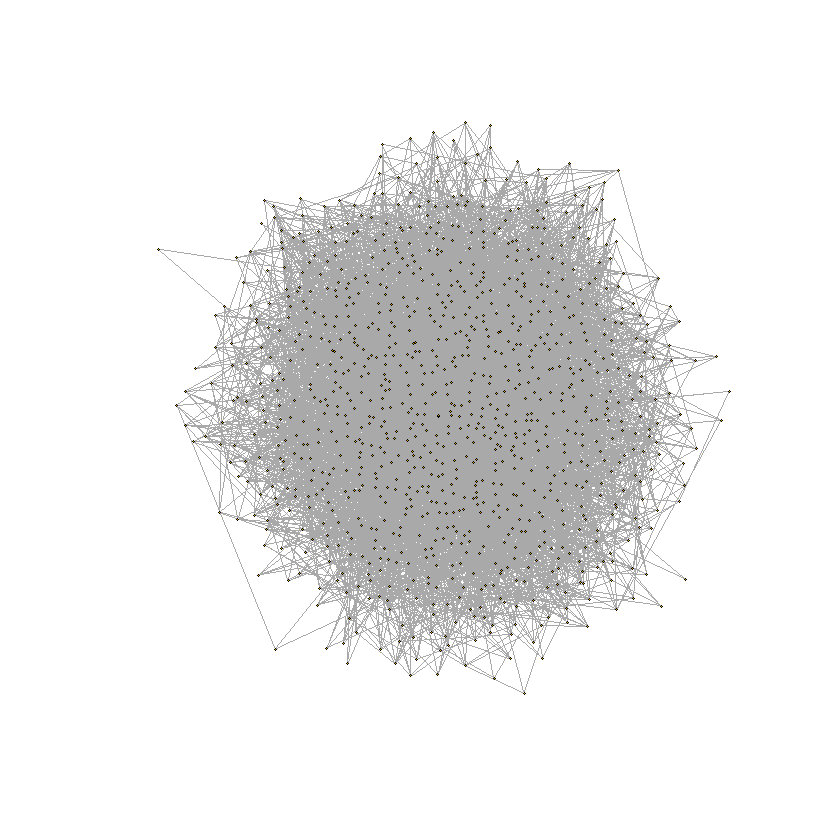

In [72]:
n <- 1000
graph <- erdos.renyi.game(n = n, p = 0.01, directed = FALSE)
print(paste("Connected: ", is.connected(graph)))
plot(graph, vertex.size=1, vertex.label=NA)

<h1>Question 2.1b and 2.1c</h1>

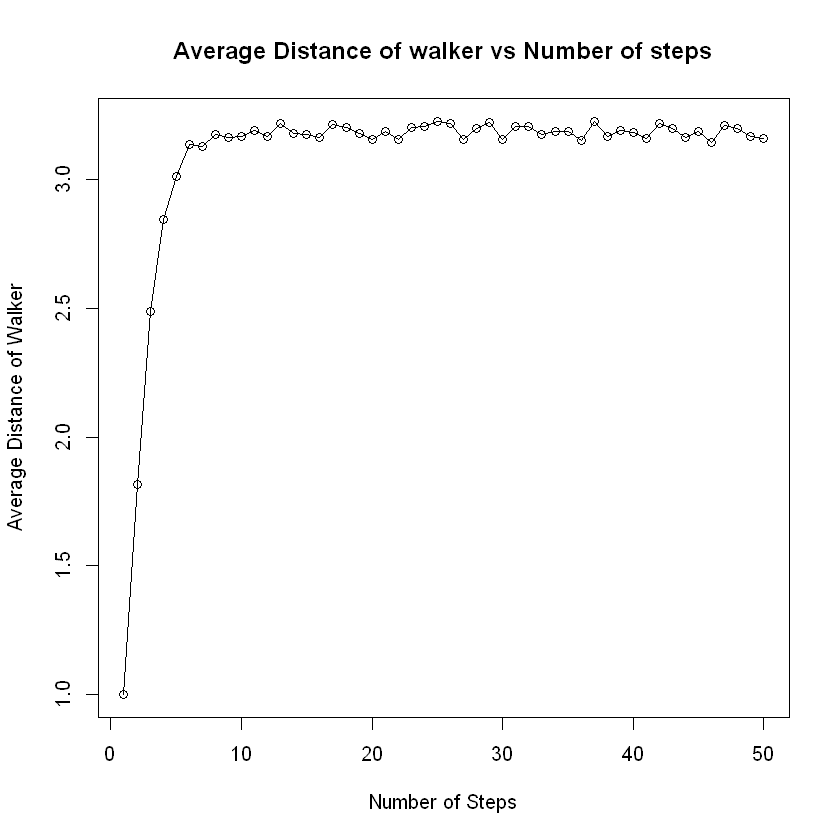

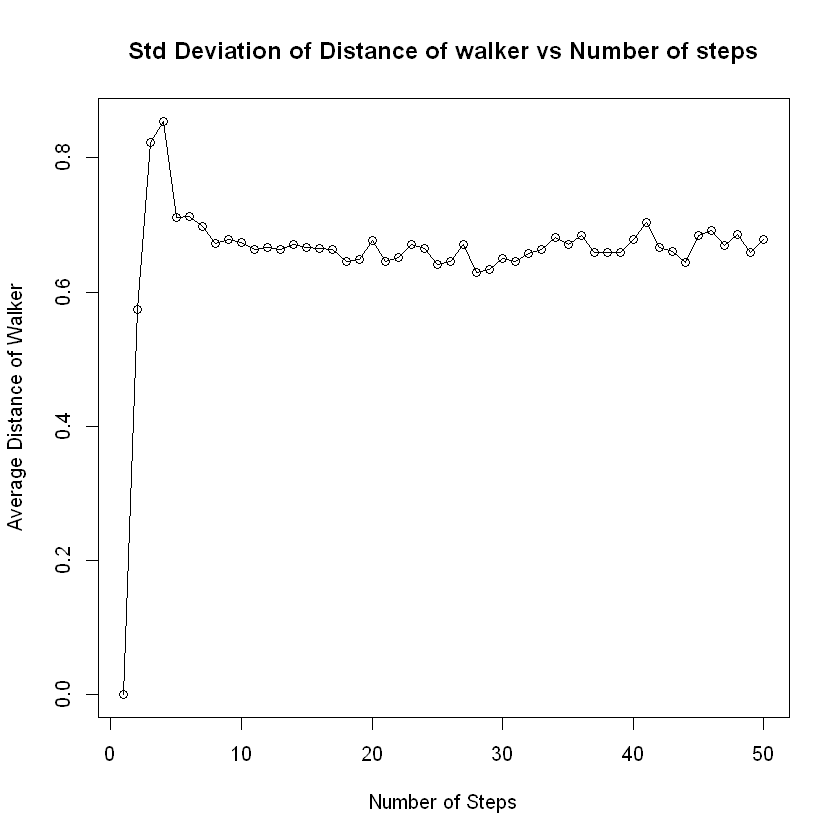

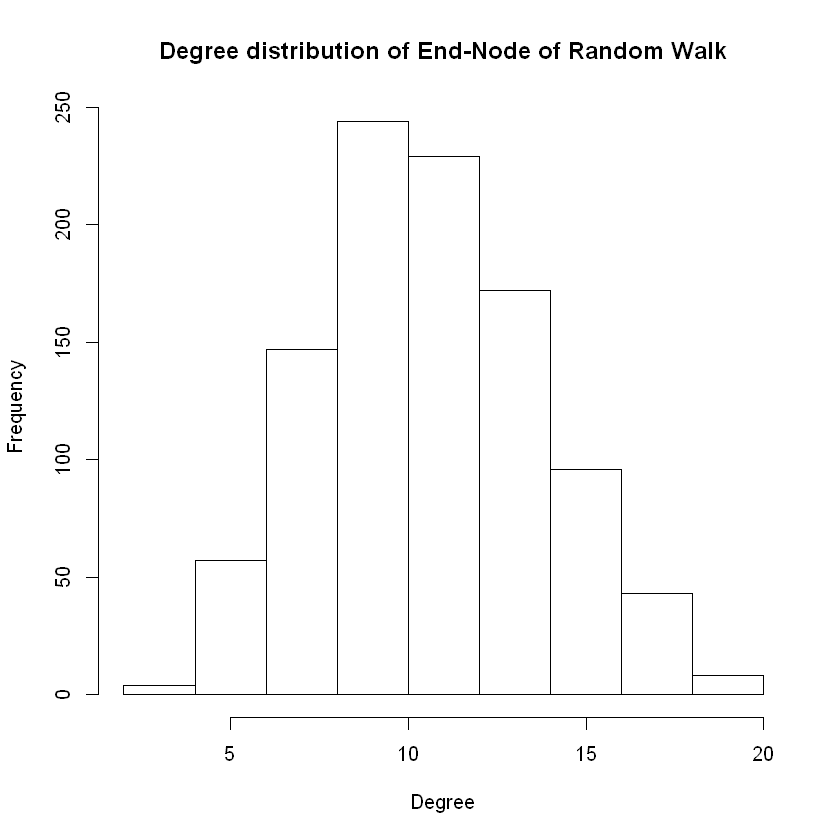

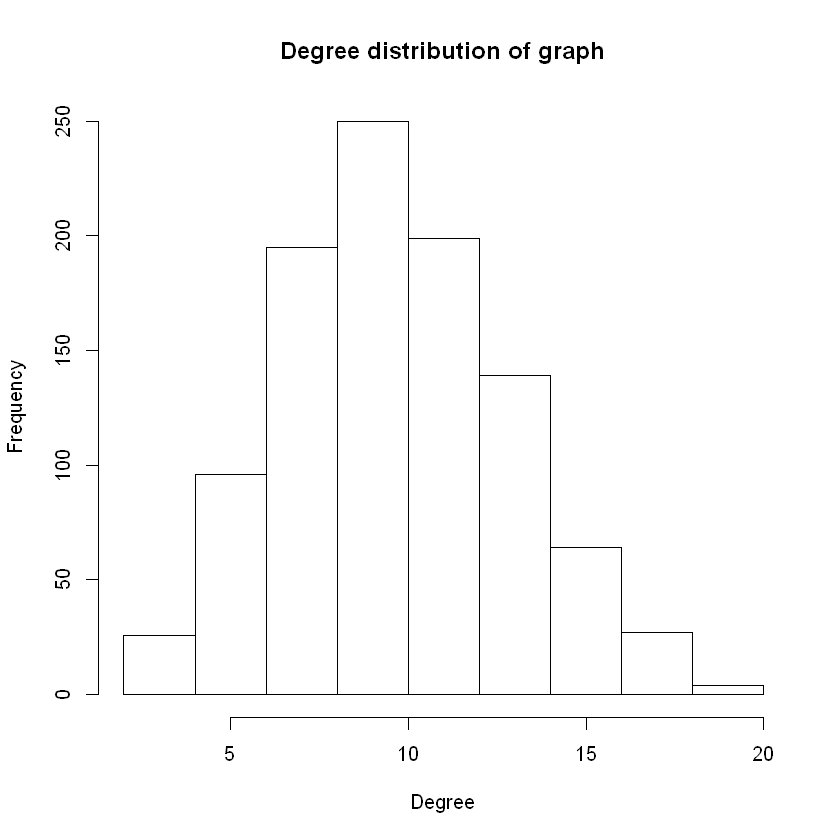

In [73]:
graph_gcc <- get_gcc(graph)
random_walk_calc(graph_gcc, gorder(graph_gcc), num_steps = 50, num_start_nodes = gorder(graph_gcc), randomize = FALSE)

<h1>Question 2.1d</h1>

<h1>100 node Erdos Reyni with p = 0.01</h1>

[1] "Connected:  FALSE"


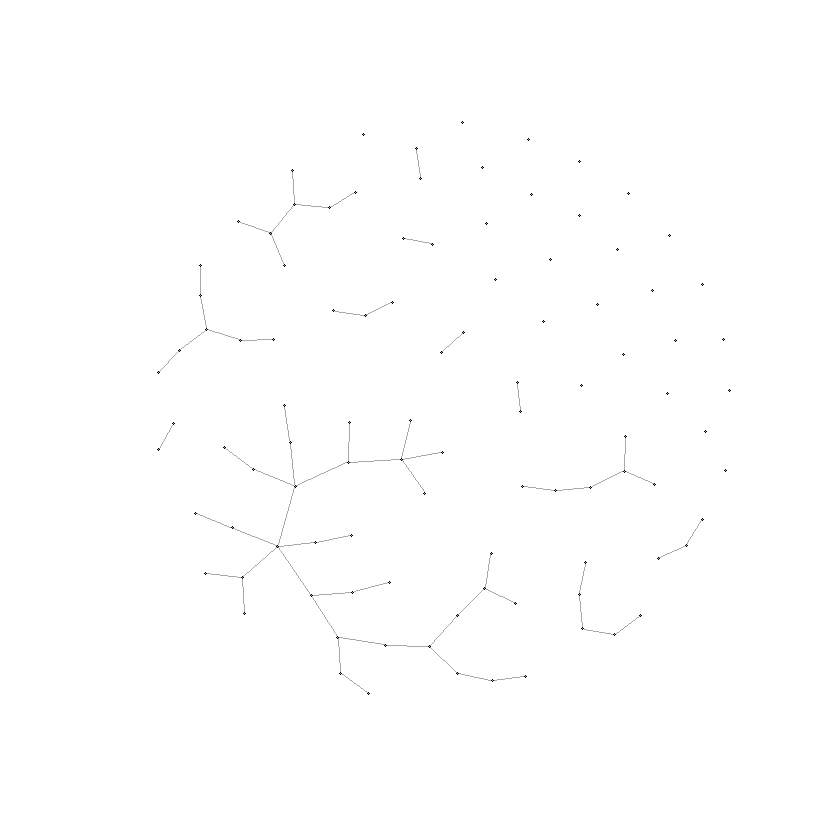

In [81]:
n <- 100
graph <- erdos.renyi.game(n = n, p = 0.01, directed = FALSE)
print(paste("Connected: ", is.connected(graph)))
plot(graph, vertex.size=1, vertex.label=NA)

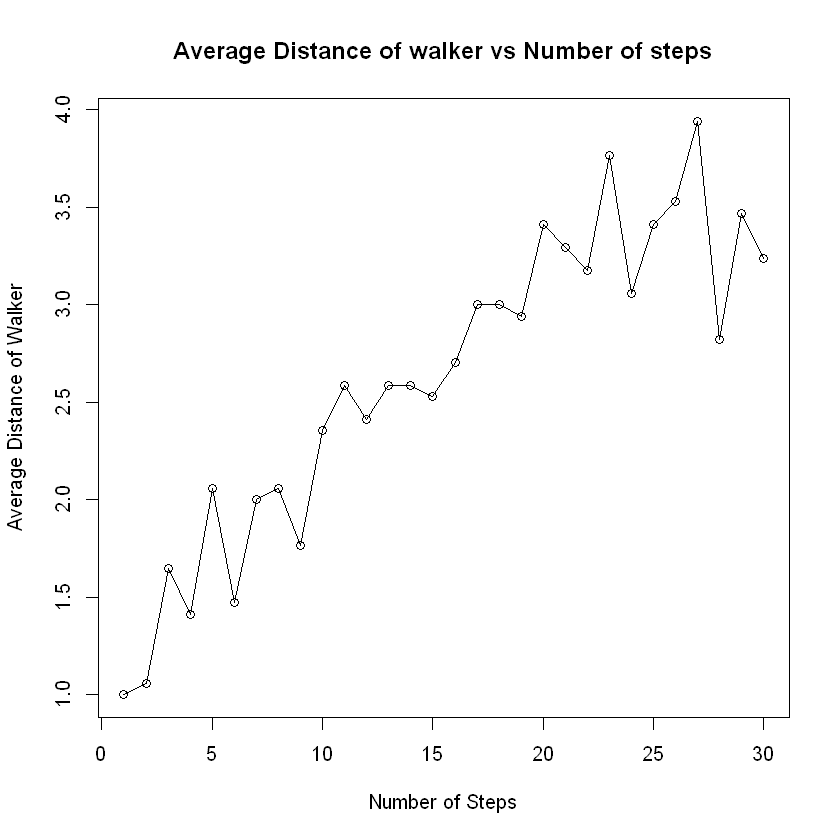

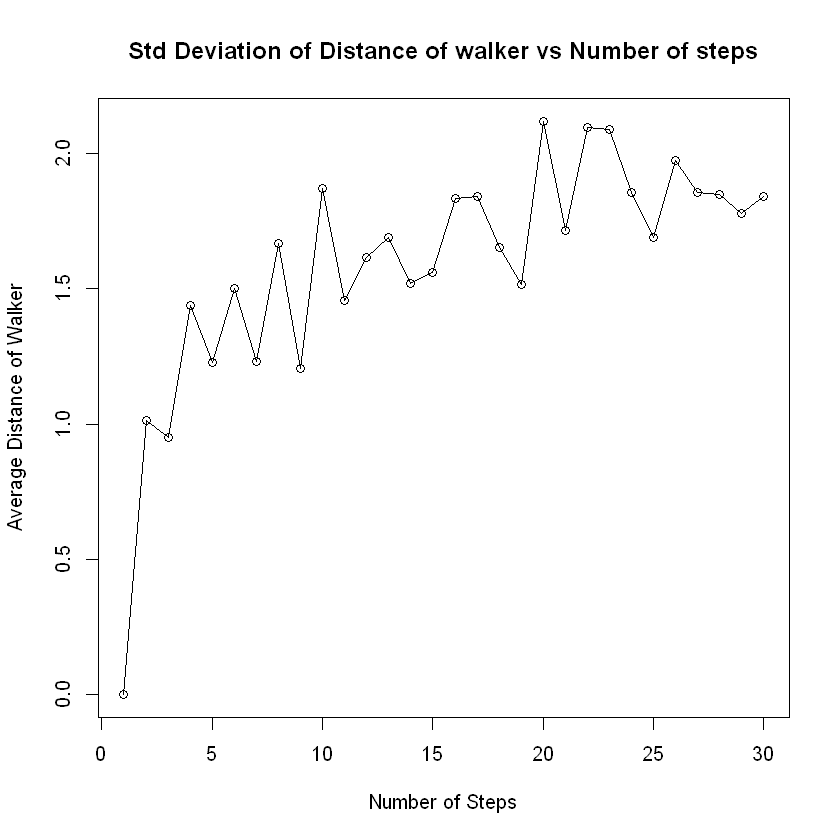

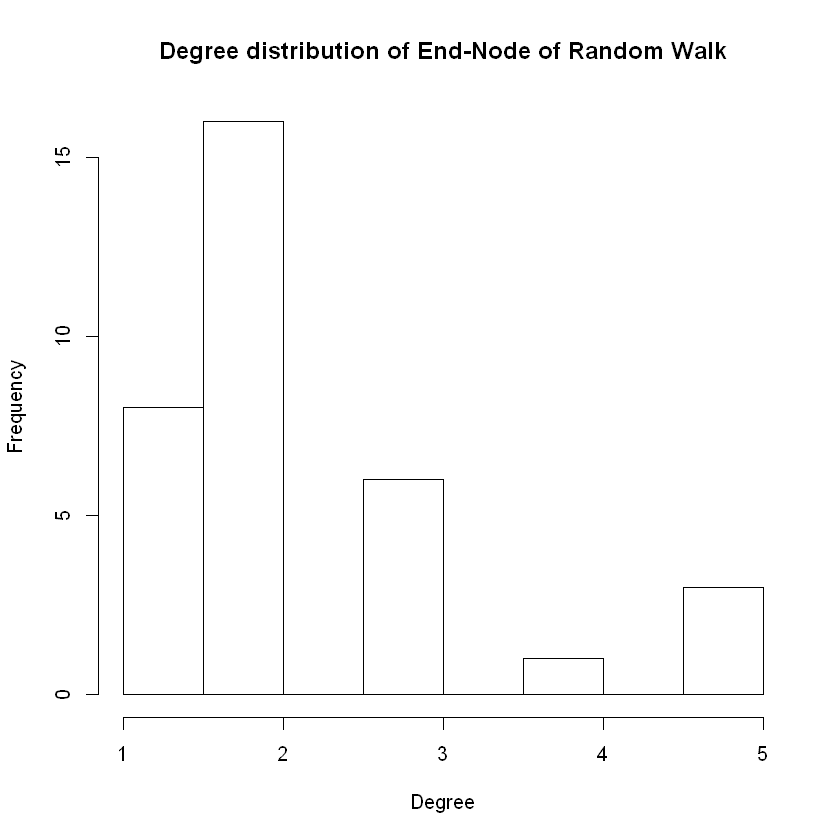

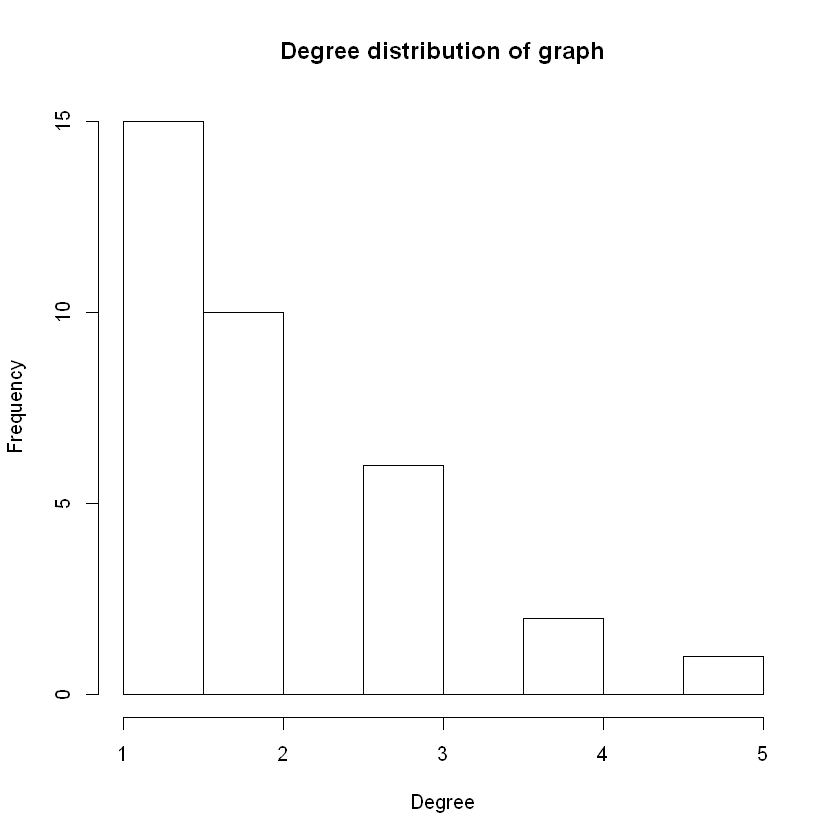

In [82]:
graph_gcc <- get_gcc(graph)
random_walk_calc(graph_gcc, gorder(graph_gcc), num_steps = 30, num_start_nodes = gorder(graph_gcc), randomize = FALSE)

<h1>100 node Erdos Reyni with p = 0.07</h1>

[1] "Connected:  TRUE"


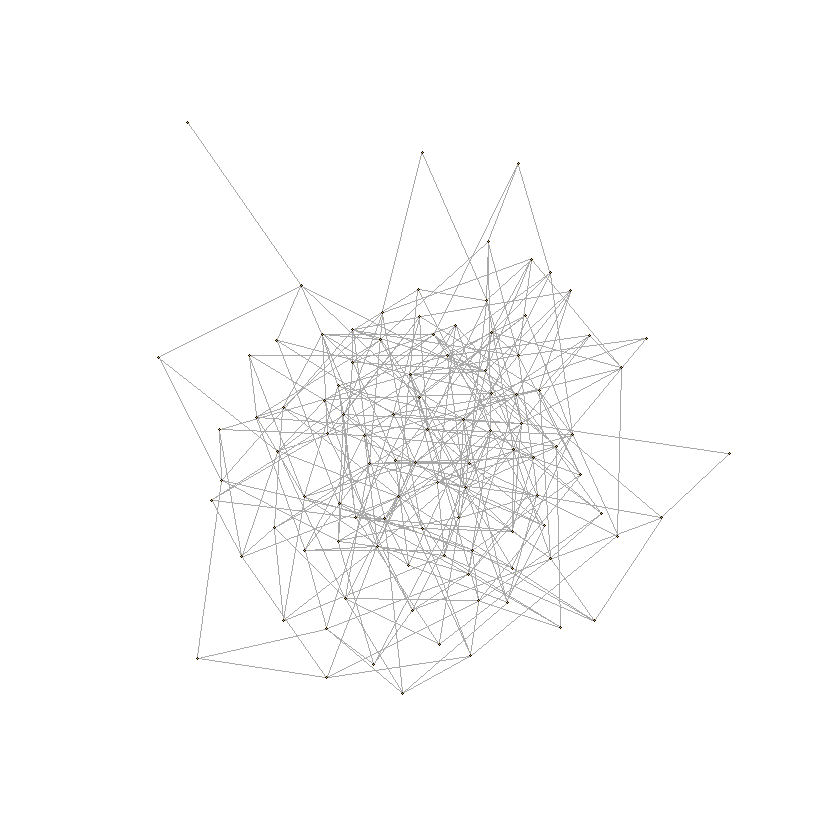

In [87]:
n <- 100
graph <- erdos.renyi.game(n = n, p = 0.07, directed = FALSE)
print(paste("Connected: ", is.connected(graph)))
plot(graph, vertex.size=1, vertex.label=NA)

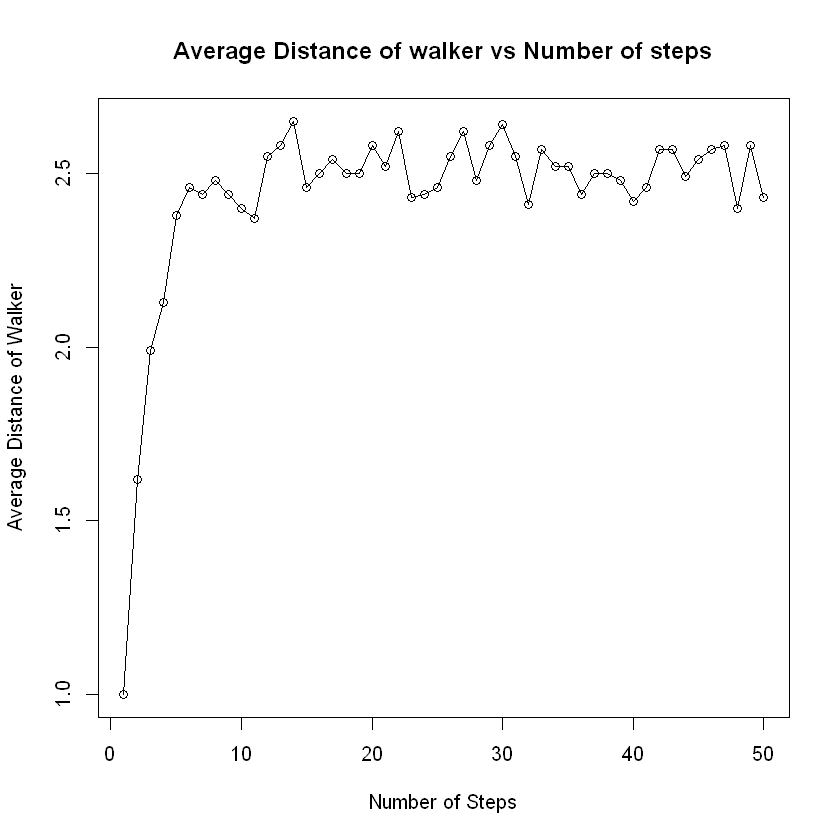

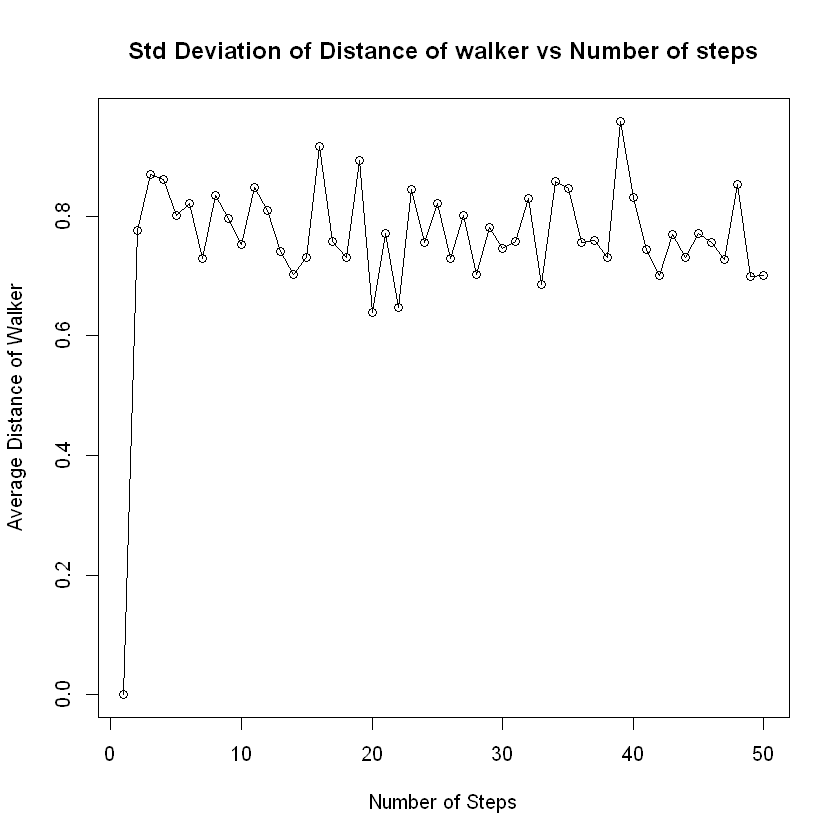

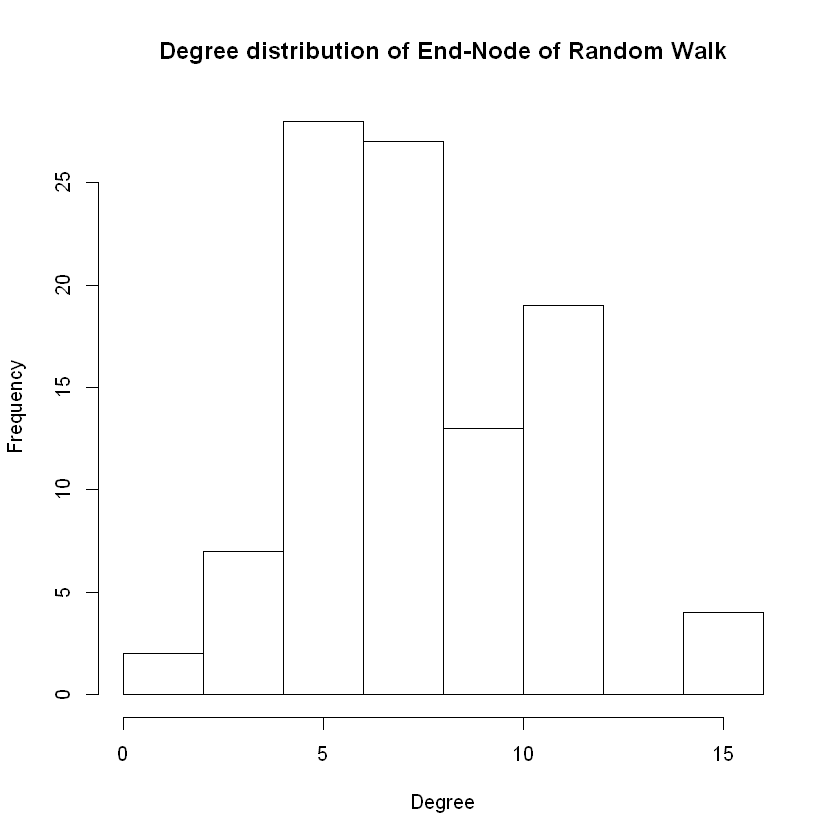

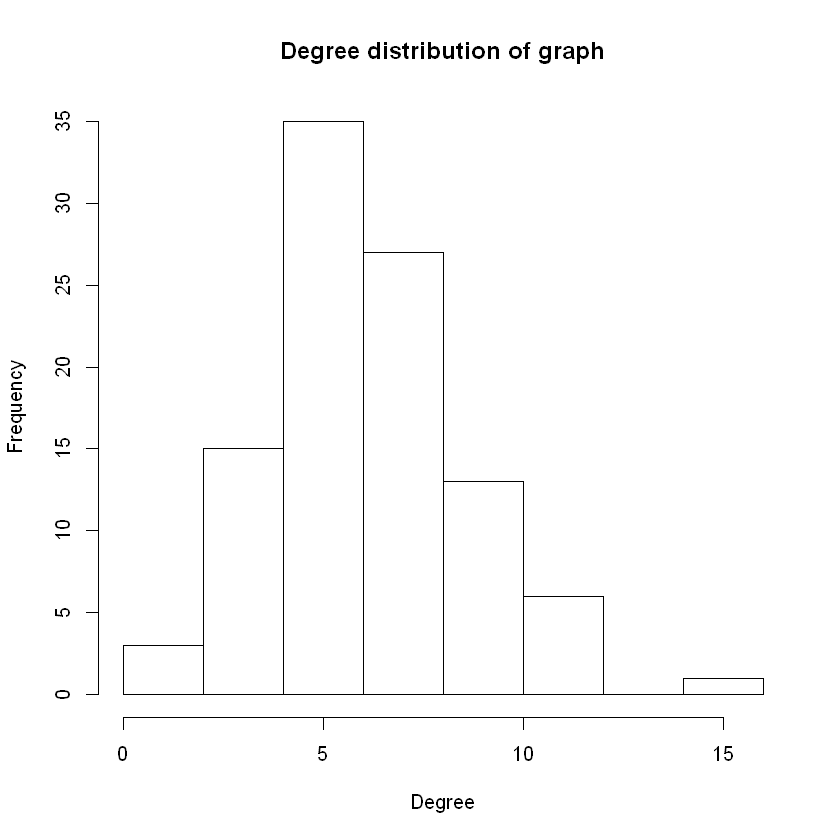

In [88]:
graph_gcc <- get_gcc(graph)
random_walk_calc(graph_gcc, gorder(graph_gcc), num_steps = 50, num_start_nodes = gorder(graph_gcc), randomize = FALSE)